# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)

#Sample Set for testing code
#lats = np.random.uniform(lat_range[0], lat_range[1], size=100)
#lngs = np.random.uniform(lng_range[0], lng_range[1], size=100)

lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
print(cities)

# Print the city count to confirm sufficient count
len(cities)


['kato mazarakion', 'puerto ayora', 'gonbad-e qabus', 'coquimbo', 'georgetown', 'albany', 'yar-sale', 'anadyr', 'ushuaia', 'husavik', 'yenagoa', 'pangnirtung', 'lugazi', 'bredasdorp', 'busselton', 'fredericton', 'clyde river', 'fortuna', 'kismayo', 'hermanus', 'le vauclin', 'lorengau', 'virginia beach', 'qaanaaq', 'srednekolymsk', 'naze', 'shelburne', 'maniitsoq', 'hobart', 'saskylakh', 'taitung', 'powell', 'caravelas', 'dingle', 'torbay', 'keetmanshoop', 'carutapera', 'kapaa', 'bilma', 'jamestown', 'leh', 'fengzhen', 'fort walton beach', 'sitka', 'saint-philippe', 'alofi', 'atuona', 'rikitea', 'mataura', 'talnakh', 'carnarvon', 'nalhati', 'codrington', 'atambua', 'matara', 'port alfred', 'harnosand', 'ilulissat', 'alta gracia', 'punta arenas', 'ust-uda', 'nikolskoye', 'ribeira grande', 'ribera', 'roald', 'tasiilaq', 'khatanga', 'lagoa', 'sentyabrskiy', 'yeppoon', 'moshny', 'ahuimanu', 'kamuli', 'provideniya', 'tual', 'chuy', 'vaini', 'ust-nera', 'gat', 'victoria', 'kaitangata', 'sumbe

611

## Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Create a base url
base_url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=" + weather_api_key
#print(base_url)

# Create the lists to hold relative data
found_cities =[]
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Create a query url for each city in the cities list to get json response

print("Processing API calls from Open Weather")
for city in cities:
    
    time.sleep(1)
         
    # Create API url for each city
    query_url = base_url +"&q=" + city

    
    # Get json respose for each city
    response = requests.get(query_url).json()

   # Add the values to the lists
    try:       
        found_cities.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])

        print(f"{city} was found in weather data") 
        
    except KeyError:
        print(f"{city} not found. Skipped")
        pass
        
print("End of City list")



Processing API calls from Open Weather
kato mazarakion was found in weather data
puerto ayora was found in weather data
gonbad-e qabus was found in weather data
coquimbo was found in weather data
georgetown was found in weather data
albany was found in weather data
yar-sale was found in weather data
anadyr was found in weather data
ushuaia was found in weather data
husavik was found in weather data
yenagoa was found in weather data
pangnirtung was found in weather data
lugazi was found in weather data
bredasdorp was found in weather data
busselton was found in weather data
fredericton was found in weather data
clyde river was found in weather data
fortuna was found in weather data
kismayo was found in weather data
hermanus was found in weather data
le vauclin was found in weather data
lorengau was found in weather data
virginia beach was found in weather data
qaanaaq was found in weather data
srednekolymsk was found in weather data
naze was found in weather data
shelburne was found in 

monrovia was found in weather data
lebu was found in weather data
banepa was found in weather data
east london was found in weather data
kichmengskiy gorodok was found in weather data
bay roberts was found in weather data
rio gallegos was found in weather data
pokhara was found in weather data
bolonchen not found. Skipped
berlevag was found in weather data
bathsheba was found in weather data
mar del plata was found in weather data
teya was found in weather data
yellowknife was found in weather data
sinnamary was found in weather data
batagay was found in weather data
morant bay was found in weather data
indramayu was found in weather data
kerteh not found. Skipped
aklavik was found in weather data
lac du bonnet was found in weather data
bolungarvik not found. Skipped
humaita was found in weather data
mocuba was found in weather data
margate was found in weather data
malabo was found in weather data
dudinka was found in weather data
saint-joseph was found in weather data
khonsa was foun

cidreira was found in weather data
tambura was found in weather data
san patricio was found in weather data
henderson was found in weather data
piacabucu was found in weather data
barra dos coqueiros was found in weather data
bethel was found in weather data
hofn was found in weather data
scarborough was found in weather data
nova friburgo was found in weather data
fairbanks was found in weather data
kearney was found in weather data
geraldton was found in weather data
haines junction was found in weather data
dalby was found in weather data
kuala terengganu was found in weather data
inuvik was found in weather data
avera was found in weather data
toliary not found. Skipped
flinders was found in weather data
muroto was found in weather data
port macquarie was found in weather data
dovers was found in weather data
khandyga was found in weather data
coahuayana was found in weather data
alotau not found. Skipped
ponta do sol was found in weather data
mahebourg was found in weather data
ca

In [4]:
#Create Dictionary

weather_raw_data = {
    "City": found_cities,
    "Latitude": lat,
    "Lng": lng,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Max Temp": max_temp,
    "Wind Speed": wind_speed,
    "Date":date
    }

#Create Data Frame
weather_df = pd.DataFrame.from_dict(weather_raw_data, orient= 'columns')

#export to cs
weather_df.to_csv("output_data/cities.csv", index = False)
weather_df

,City,Latitude,Lng,Cloudiness,Country,Date,Humidity,Max Temp,Wind Speed
0,Káto Mazaráki,38.07,21.65,20,GR,1603225924,87,60.80,7.00
1,Puerto Ayora,-0.74,-90.35,75,EC,1603225925,69,77.00,11.41
2,Gonbad-e Kāvūs,37.25,55.17,0,IR,1603225926,52,64.81,4.70
3,Coquimbo,-29.95,-71.34,1,CL,1603225867,72,60.80,16.11
4,George Town,5.41,100.34,20,MY,1603225928,88,80.60,3.36
...,...,...,...,...,...,...,...,...,...
558,Ulladulla,-35.35,150.47,31,AU,1603226608,100,57.00,1.12
559,Sheridan,44.83,-106.92,90,US,1603226610,70,44.60,3.36
560,Krasnosel'kup,65.70,82.47,100,RU,1603226368,98,24.17,10.02
561,Oranjestad,12.52,-70.03,20,AW,1603226545,88,77.00,11.41


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

### Latitude vs. Temperature Plot

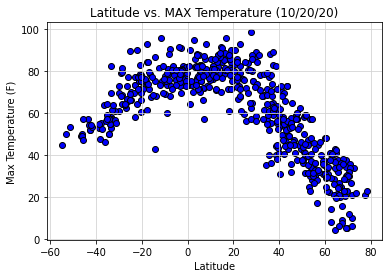

In [5]:
#create plot
plt.scatter(weather_df['Latitude'],weather_df['Max Temp'],edgecolors='black',facecolors='b')

#title and labels
plt.title(f'Latitude vs. MAX Temperature ({datetime.datetime.now().strftime("%D")})')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid (b=True,which='major',axis='both',linestyle='-',color='lightgrey')

#Save Plot
plt.savefig(f'images/Latitude vs. MAX Temperature.png')

### Latitude vs. Humidity Plot

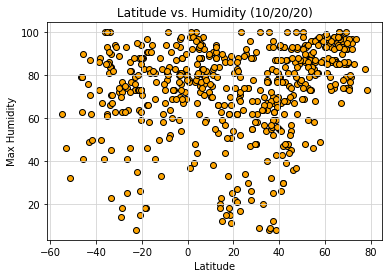

In [6]:
#create plot
plt.scatter(weather_df['Latitude'],weather_df['Humidity'],edgecolors='black',facecolors='orange')

#title and labels
plt.title(f'Latitude vs. Humidity ({datetime.datetime.now().strftime("%D")})')
plt.xlabel('Latitude')
plt.ylabel('Max Humidity')
plt.grid (b=True,which='major',axis='both',linestyle='-',color='lightgrey')

#Save Plot
plt.savefig(f"Images/Latitude vs. Humidity.png")

### Latitude vs. Cloudiness Plot

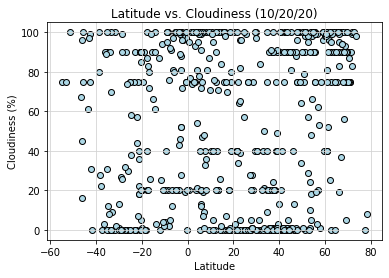

In [7]:
#Create Plot
plt.scatter(weather_df['Latitude'],weather_df['Cloudiness'],edgecolors='black',facecolors='lightblue')

#titles and lables
plt.title(f'Latitude vs. Cloudiness ({datetime.datetime.now().strftime("%D")})')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid (b=True,which='major',axis='both',linestyle='-',color='lightgrey')

#Save Plot
plt.savefig(f"images/Latitude vs. Cloudiness.png")

### Latitude vs. Wind Speed Plot

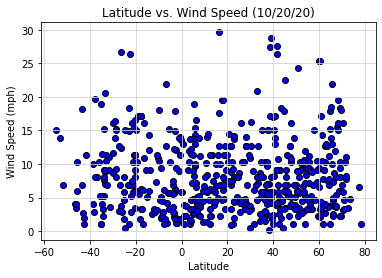

In [8]:
plt.scatter(weather_df["Latitude"],weather_df["Wind Speed"],edgecolors="black",facecolors='b')
plt.title(f'Latitude vs. Wind Speed ({datetime.datetime.now().strftime("%D")})')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid (b=True,which='major',axis='both',linestyle='-',color='lightgrey')
plt.savefig(f'images/City Latitude vs. Wind Speed.png')

## Linear Regression

### Write linear regression plot function (optional)

In [9]:
#create hemispheres
north_hem = weather_df.loc[weather_df["Latitude"] >= 0]
south_hem = weather_df.loc[weather_df["Latitude"] < 0]


In [10]:
# Define function
def linear_regression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.grid (b=True,which='major',axis='both',linestyle='-',color='lightgrey')
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# Define annotation
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="orange")

###  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : -0.88


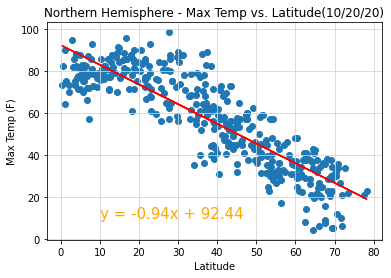

In [22]:
#use functions
equation = linear_regression(north_hem["Latitude"],north_hem["Max Temp"])
annotate(equation, 10, 10)

#title and labels
plt.title(f'Northern Hemisphere - Max Temp vs. Latitude({datetime.datetime.now().strftime("%D")})')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')

# Save the figure
plt.savefig(f"Images/Northern Hemisphere | Max Temp vs. Latitude Regression.png")

In [23]:
#Northern Hemisphere | Max Temp vs. Latitude
#The r-squared is : -0.88
#Temperature decreases as you move south from the equator. There is a strong linear coorelation. 

###  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.75


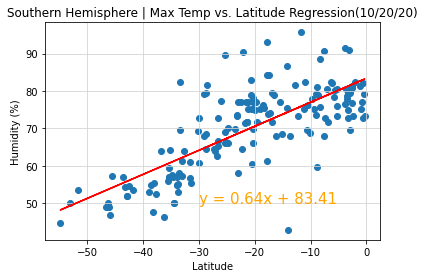

In [12]:
#use functions
equation = linear_regression(south_hem["Latitude"],south_hem["Max Temp"])
annotate(equation, -30, 50)

#title and labels
plt.title(f'Southern Hemisphere | Max Temp vs. Latitude Regression({datetime.datetime.now().strftime("%D")})')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig(f"Images/Southern Hemisphere | Max Temp vs. Latitude Regression.png")

In [ ]:
#Southern Hemisphere | Max Temp vs. Latitude
#The r-squared is : 0.75
#Temperature decreases as you move north from the equator. There is a weak linear coorelation. 

###  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.27


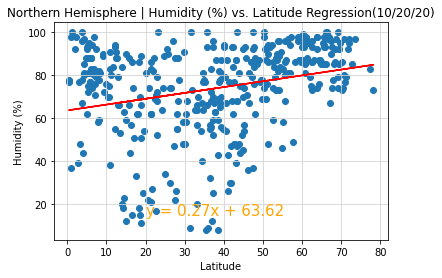

In [13]:
#use functions
equation = linear_regression(north_hem["Latitude"],north_hem["Humidity"])
annotate(equation, 20, 15)

#title and labels
plt.title(f'Northern Hemisphere | Humidity (%) vs. Latitude Regression({datetime.datetime.now().strftime("%D")})')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig(f"Images/Northern Hemisphere | Humidity (%) vs. Latitude Regression.png")

In [ ]:
#Northern Hemisphere | Humidity vs. Latitude
#The r-squared is : 0.27
#The coorelation between humidity and latitude is weak in the Northern hemisphere.  

###  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.15


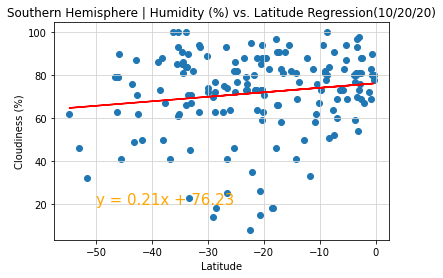

In [14]:
#use functions
equation = linear_regression(south_hem["Latitude"],south_hem["Humidity"])
annotate(equation, -50, 20)

#title and labels
plt.title(f'Southern Hemisphere | Humidity (%) vs. Latitude Regression({datetime.datetime.now().strftime("%D")})')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig(f"Images/Southern Hemisphere | Humidity (%) vs. Latitude Regression.png")

In [ ]:
#Southern Hemisphere | Humidity vs. Latitude
#The r-squared is : 0.15
#The coorelation between humidity and latitude is weak in the Southern hemisphere.  

###  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.2


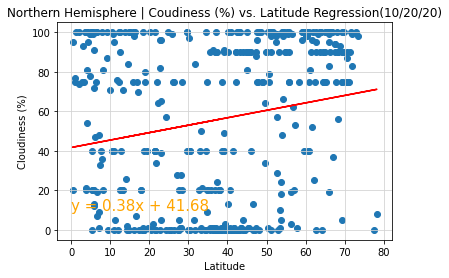

In [15]:
#plot variable
title_5 = "Northern Hemisphere - Cloudiness vs. Latitude Regression"

#use functions
equation = linear_regression(north_hem["Latitude"],north_hem["Cloudiness"])
annotate(equation, 0, 10)

#title and labels
plt.title(f'Northern Hemisphere | Coudiness (%) vs. Latitude Regression({datetime.datetime.now().strftime("%D")})')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig(f"images/Northern Hemisphere | Cloudiness (%) vs. Latitude Regression.png")

In [24]:
#Northern Hemisphere | Cloudiness vs. Latitude
#The r-squared is : 0.2
#The coorelation between cloudiness and latitude does not exsist.  

###  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.15


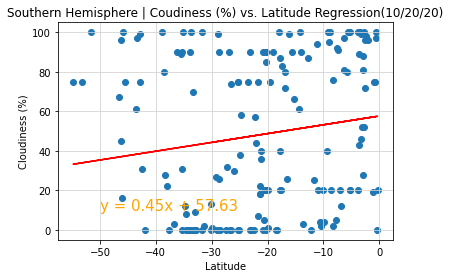

In [16]:
#use functions
equation = linear_regression(south_hem["Latitude"],south_hem["Cloudiness"])
annotate(equation, -50, 10)

#title and labels
plt.title(f'Southern Hemisphere | Coudiness (%) vs. Latitude Regression({datetime.datetime.now().strftime("%D")})')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig(f"images/Southern Hemisphere | Cloudiness (%) vs. Latitude Regression.png")

In [ ]:
#Southern Hemisphere | Cloudiness vs. Latitude
#The r-squared is : 0.15
#The coorelation between cloudiness and latitude does not exsist. 

###  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.05


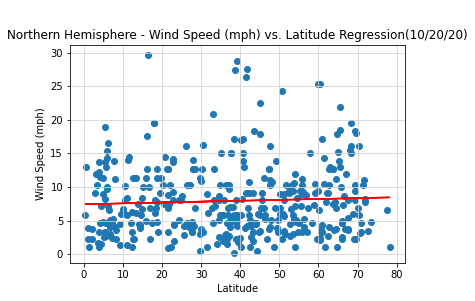

In [20]:
#plot variable
title_7 = "Northern Hemisphere - Wind Speed (mph) vs. Latitude Regression"

#use functions
equation = linear_regression(north_hem["Latitude"],north_hem["Wind Speed"])
annotate(equation, 0, 35)

#title and labels
plt.title(f'Northern Hemisphere - Wind Speed (mph) vs. Latitude Regression({datetime.datetime.now().strftime("%D")})')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig(f"images/Northern Hemisphere - Wind Speed (mph) vs. Latitude Regression.png")

In [ ]:
#Northern Hemisphere | Wind Speed vs. Latitude
#The r-squared is : 0.05
#The coorelation between Wind Speed and latitude does not exsist. 

###  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.08


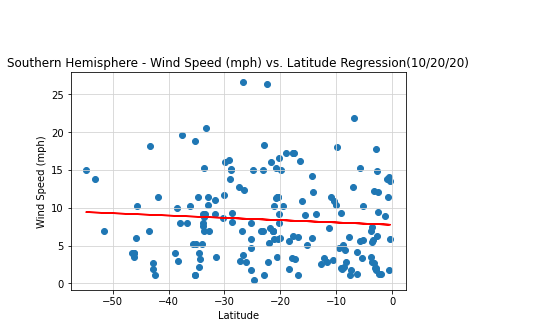

In [25]:
#use functions
equation = linear_regression(south_hem['Latitude'],south_hem['Wind Speed'])
annotate(equation, 0, 35)

#title and labels
plt.title(f'Southern Hemisphere - Wind Speed (mph) vs. Latitude Regression({datetime.datetime.now().strftime("%D")})')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

# Save the figure
plt.savefig(f'images/Southern Hemisphere - Wind Speed (mph) vs. Latitude Regression.png')

In [ ]:
#Southern Hemisphere | Wind Speed vs. Latitude
#The r-squared is : 0.05
#The coorelation between Wind Speed and latitude presents as weak. 